# Tarefa 08 - Parte 1

In [15]:
from PIL import Image as img
import matplotlib.pyplot as plt
import numpy as np
import math

papColorido = img.open("papagaio_colorido.jpg")
papMonocromatico = img.open("papagaio_monocromatico.jpg")

def plot(img1, img2, img3):
    fig = plt.figure(figsize=(100,100))
    a=fig.add_subplot(1,3,1)
    imgplot = plt.imshow(img1)
    a.set_title('Imagem 1')

    a=fig.add_subplot(1,3,2)
    imgplot = plt.imshow(img2)
    imgplot.set_clim(0.0,0.7)
    a.set_title('Imagem 2')    
    
    a=fig.add_subplot(1,3,3)
    imgplot = plt.imshow(img3)
    imgplot.set_clim(0.0,0.7)
    a.set_title('Final')

def componentesRGB(im):
    ig = im.copy()
    largura, altura = ig.size
    n = ig.load()
    R = []
    G = []
    B = []
    for x in range(largura):
        for y in range(altura):
            r,g,b = n[x,y]
            R.append(r)
            G.append(g)
            B.append(b)
    return R,G,B

def calculaCoef(largura, altura, x, y):
    if x <= (largura / 2):
        coefX = x / (largura / 2)
    else: 
        coefX = 1 - ((x / (largura / 2)) - 1)
    if y <= (altura / 2):   
        coefY = y / (altura / 2)
    else:
        coefY = 1 - ((y / (altura / 2)) - 1)
    return coefX, coefY

def soma(img1,img2):
    c = []
    ig1 = img1.copy()
    ig2 = img2.copy()
    largura, altura = ig1.size
    r,g,b = componentesRGB(ig1)
    R,G,B = componentesRGB(ig2)    
    new = img.new('RGB', (largura, altura), 'white')
    n = new.load()
    
    for x in range(largura):
        for y in range(altura):
            cx, cy = calculaCoef(largura, altura, x, y)
            #n[x, y] = r[x*(altura)+y] + R[x*(altura)+y], g[x*altura+y] + G[x*altura+y], b[x*altura+y] + B[x*altura+y]
            n[x, y] = int((cx*cy)*r[x*(altura)+y] + (1-(cx*cy))*R[x*(altura)+y]), int((cx*cy)*g[x*altura+y] + (1-(cx*cy))*G[x*altura+y]), int((cx*cy)*b[x*altura+y] + (1-(cx*cy))*B[x*altura+y])
    return new

#cria o mapa de pixels
def pixelMap(image):
    return image.load()

def add_fronteira(image):
    img1 = image.copy()
    px1 = pixelMap(img1)
    
    img0 = img.new("RGB", (int(img1.size[0]+2), int(img1.size[1]+2)), color="white")
    px0 = pixelMap(img0)
    
    for i in range(img1.size[0]):
        for j in range(img1.size[1]):
            px0[i+1, j+1] = px1[i,j]
    return img0

def del_fronteira(image):
    img1 = image.copy()
    px1 = pixelMap(img1)
    
    img0 = img.new("RGB", (int(img1.size[0]-2), int(img1.size[1]-2)), color="white")
    px0 = pixelMap(img0)
    
    for i in range(img0.size[0]):
        for j in range(img0.size[1]):
            px0[i,j] = px1[i+1, j+1]
    return img0

def f_media(image):
    img = image.copy()
    px = pixelMap(img)
    
    for i in range(1,(img.size[0]-1)):
        for j in range(1,(img.size[1]-1)):
            r = int((px[i-1,j-1][0] + px[i,j-1][0] + px[i+1,j-1][0] +
                      px[i-1,j][0]   + px[i,j][0]   + px[i+1,j][0]   +
                      px[i-1,j+1][0] + px[i,j+1][0] + px[i+1,j+1][0]  )/9)
            
            g = int((px[i-1,j-1][1] + px[i,j-1][1] + px[i+1,j-1][1] +
                      px[i-1,j][1]   + px[i,j][1]   + px[i+1,j][1]   +
                      px[i-1,j+1][1] + px[i,j+1][1] + px[i+1,j+1][1]  )/9)
            
            b = int((px[i-1,j-1][2] + px[i,j-1][2] + px[i+1,j-1][2] +
                      px[i-1,j][2]   + px[i,j][2]   + px[i+1,j][2]   +
                      px[i-1,j+1][2] + px[i,j+1][2] + px[i+1,j+1][2]  )/9)
            px[i,j] = (r,g,b)
    return img

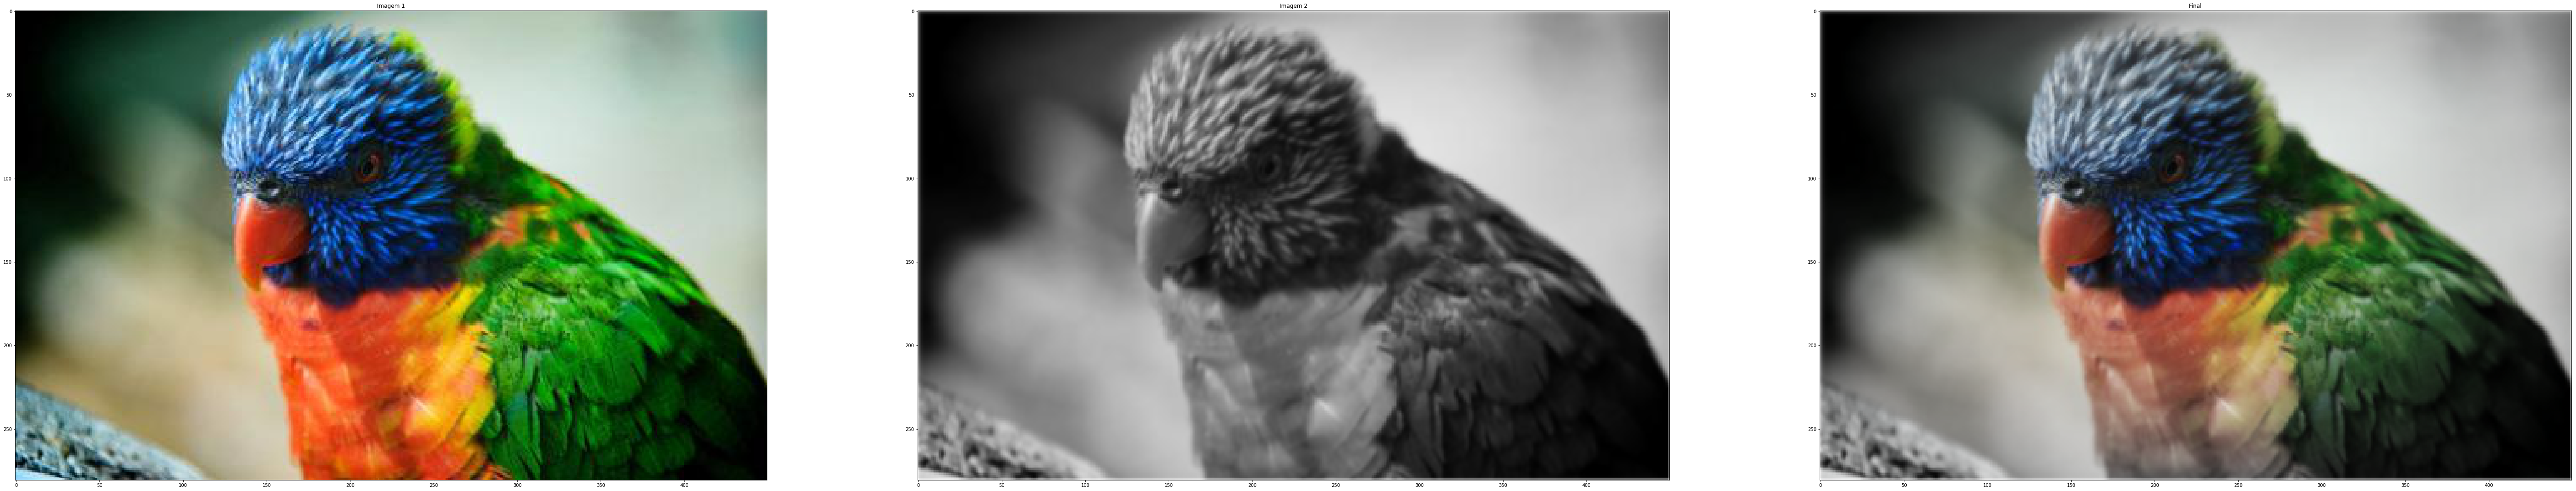

In [16]:
resultado = add_fronteira(papMonocromatico)
resultado = f_media(resultado)
resultado = del_fronteira(resultado)
papNovo = soma(papColorido, resultado)

plot(papColorido, resultado, papNovo)

## Salvando os arquivos:

In [18]:
papColorido.save("./resource/img/Tarefa08/parte01/papagaio_colorido.jpg")
resultado.save("./resource/img/Tarefa08/parte01/papagaio_filtro_media.jpg")
papNovo.save("./resource/img/Tarefa08/parte01/papagaio_combinação.jpg")